In [1]:
import numpy as np
import pandas as pd                               ## ödev sorularına geçmeden önce eksik verileri dolduralım.
import warnings

warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
state = pd.read_csv("states_all.csv")
state.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [68]:
yil_ort = state.groupby("YEAR").mean()

In [3]:
for sutun in state.columns[3:,]:
    
    for i in state["YEAR"].unique():
        
        state[sutun][(state["YEAR"]==i) & (state[sutun].isnull())] = yil_ort[sutun][i]

In [69]:
state.isnull().sum().head()

PRIMARY_KEY      0
STATE            0
YEAR             0
ENROLL           0
TOTAL_REVENUE    0
dtype: int64

In [5]:
for eyalet in state["STATE"].unique():
    state[state["STATE"] == eyalet] = state[state["STATE"] == eyalet].interpolate(limit_direction = "both")
        
state.head()  

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,727716.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,237222.0,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,472847.0,208148.0,731634.0,208.000000,252.000000,207.000000,260.0
1,1992_ALASKA,ALASKA,1992,121156.0,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,36291.0,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,83217.0,36474.0,122487.0,218.418605,266.325581,215.372093,260.0
2,1992_ARIZONA,ARIZONA,1992,676297.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,164083.0,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,522450.0,217764.0,673477.0,215.000000,265.000000,209.000000,260.0
3,1992_ARKANSAS,ARKANSAS,1992,311432.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,68617.0,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,282911.0,133449.0,441490.0,210.000000,256.000000,211.000000,260.0
4,1992_CALIFORNIA,CALIFORNIA,1992,5129788.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,1608514.0,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3591033.0,1578929.0,5254844.0,208.000000,261.000000,202.000000,260.0


In [70]:
state.isnull().sum().head()

PRIMARY_KEY      0
STATE            0
YEAR             0
ENROLL           0
TOTAL_REVENUE    0
dtype: int64

### 1.Toplam gelir verilerini içeren TOTAL_REVENUE ve toplam harcama verilerini içeren TOTAL_EXPENDITURE değişkenlerini inceleyin. Bu değişkenler aykırı değerler içeriyor mu?

In [92]:
import matplotlib.pyplot as plt

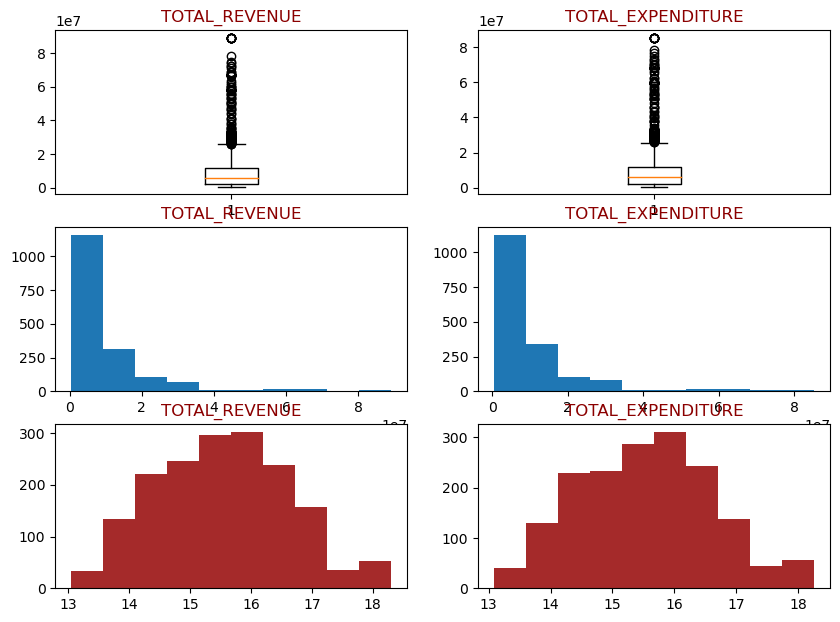

In [162]:
plt.rcParams["figure.dpi"]=100
plt.rcParams["figure.figsize"]=(10,10)
degisken = ["TOTAL_REVENUE","TOTAL_EXPENDITURE"] 

for i in range(2):
    
    plt.subplot(4,2,i+1)
    plt.boxplot(state[degisken[i]],whis=1.5)
    plt.title(degisken[i],color="darkred")
    
    
for i in range(2):
    
    plt.subplot(4,2,i+3)
    plt.hist(state[degisken[i]])
    plt.title(degisken[i],color="darkred")
    

for i in range(2):
    
    plt.subplot(4,2,i+5)
    plt.hist(np.log(state[degisken[i]]),color="brown")
    plt.title(degisken[i],color="darkred")

In [9]:
q75,q25 = np.percentile(state["TOTAL_REVENUE"],[75,25])
IQR = q75 - q25
q751,q251 = np.percentile(state["TOTAL_EXPENDITURE"],[75,25])
IQR1 = q751 - q251
print(IQR)
print(IQR1)

9501317.392156862
9344419.0


In [96]:
df = pd.DataFrame() 
degisken = ["TOTAL_REVENUE","TOTAL_EXPENDITURE"]    
for degisken in state[degisken]:
    
    q75,q25 = np.percentile(state[degisken],[75,25])
    IQR = q75 - q25
    max_deger = q75 + (IQR*1.5)
    min_deger = q25 - (IQR*1.5)
    aykiri_deger_sayisi = len(np.where((state[degisken] > max_deger) |
                                        (state[degisken] < min_deger))[0])

    df=df.append({"aykiri deger sayisi":aykiri_deger_sayisi},ignore_index=True)
        
    print("{} için aykiri deger sayisi {}".format(degisken,aykiri_deger_sayisi),"\n")
df.index = ["TOTAL_REVENUE","TOTAL_EXPENDITURE"] 
df

TOTAL_REVENUE için aykiri deger sayisi 149 

TOTAL_EXPENDITURE için aykiri deger sayisi 154 



,aykiri deger sayisi
TOTAL_REVENUE,149.0
TOTAL_EXPENDITURE,154.0


### 2.Toplam gelir (TOTAL_REVENUE) ve toplam harcama (TOTAL_EXPENDITURE) değişkenlerinde aykırı değer tespit ettiyseniz bu derste öğrendiğiniz teknikleri uygulayarak bu aykırı değerleri ortadan kaldırın ve bunu yaptıktan sonra hiçbir aykırı değer kalmadığını doğrulayın

In [13]:
state1 = state.copy()

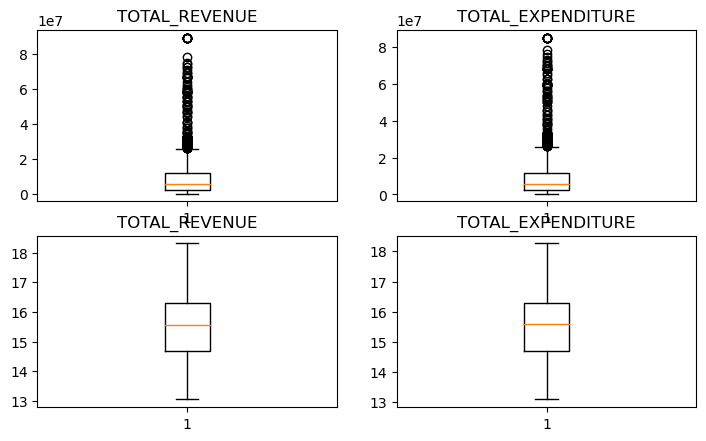

In [103]:
plt.rcParams["figure.dpi"]=100
plt.rcParams["figure.figsize"]=(8.5,5)


degisken = ["TOTAL_REVENUE","TOTAL_EXPENDITURE"]    

for i in range(2):
    
    plt.subplot(2,2,i+1)
    plt.boxplot(state1[degisken[i]])
    plt.title(degisken[i])
        
for i in range(2):       
    plt.subplot(2,2,i+3)
    plt.boxplot(np.log(state1[degisken[i]]))
    plt.title(degisken[i])
                    
            

In [16]:
df = pd.DataFrame()
degisken = ["TOTAL_REVENUE","TOTAL_EXPENDITURE"]    
for degisken in state[degisken]:
    
    q75,q25 = np.percentile(state[degisken],[75,25])
    IQR = q75 - q25
    max_deger = q75 + (IQR*1.5)
    min_deger = q25 - (IQR*1.5)
    aykiri_deger_sayisi = len(np.where((state[degisken] > max_deger) |
                                        (state[degisken] < min_deger))[0])
    
    q75_log,q25_log = np.percentile(np.log(state1[degisken]),[75,25])
    IQR_log = q75_log - q25_log
    max_deger_log = q75_log + (IQR_log*1.5)
    min_deger_log = q25_log - (IQR_log*1.5)
    aykiri_deger_sayisi_log = len(np.where((np.log(state1[degisken]) > max_deger_log) |
                                    (np.log(state1[degisken]) < min_deger_log))[0])

    df=df.append({"aykiri deger sayisi":aykiri_deger_sayisi,
                  "aykiri deger sayisi_log":aykiri_deger_sayisi_log},
                 ignore_index=True)
        
   

df.index = ["TOTAL_REVENUE","TOTAL_EXPENDITURE"]     
df

,aykiri deger sayisi,aykiri deger sayisi_log
TOTAL_REVENUE,149.0,0.0
TOTAL_EXPENDITURE,154.0,0.0


### 4.Toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama (TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun (aykırı değerleri temezlemeden). Bu yeni değişkende de aykırı değerler yer almakta mı? Varsa bu aykırı değerleri de temizleyin.

In [17]:
state["budget_deficit"] = state["TOTAL_REVENUE"] - state["TOTAL_EXPENDITURE"]


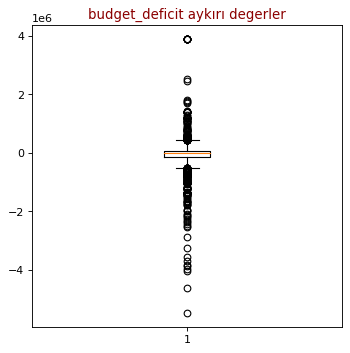

In [148]:
plt.rcParams["figure.dpi"]=80
plt.rcParams["figure.figsize"]=(5,5)
plt.boxplot(state["budget_deficit"],whis = 1.5)
plt.title("budget_deficit aykırı degerler",color="darkred")
plt.show()

In [19]:
q75,q25 = np.percentile(state["budget_deficit"],[75,25])
IQR = q75-q25
IQR

234637.5

In [20]:
max_deger = q75 + IQR*1.5
min_deger = q25 - IQR*1.5

budget_aykiri_deger = len(np.where((state["budget_deficit"] > max_deger) | (state["budget_deficit"] < min_deger))[0])
print("budget_deficit değişkeni için aykırı deger sayisi: {}".format(budget_aykiri_deger))

budget_deficit değişkeni için aykırı deger sayisi: 276


In [117]:
from scipy.stats.mstats import winsorize
temiz_budget_deficit = winsorize(state["budget_deficit"],(0.1,0.1))
state["temiz_budget_deficit"] = temiz_budget_deficit

In [115]:
q75,q25 = np.percentile(wi_budget_deficit,[75,25])
IQR = q75-q25
IQR
max_deger = q75 + IQR*1.5
min_deger = q25 - IQR*1.5

temiz_budget_aykiri_deger = len(np.where((temiz_budget_deficit > max_deger) | (temiz_budget_deficit < min_deger))[0])
print("temiz_budget_deficit değişkeni için aykırı deger sayisi: {}".format(temiz_budget_aykiri_deger))

temiz_budget_deficit değişkeni için aykırı deger sayisi: 0


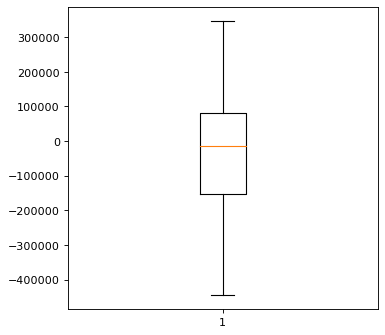

In [149]:
plt.rcParams["figure.dpi"]=80
plt.rcParams["figure.figsize"]=(5,5)
plt.boxplot(temiz_budget_deficit)
plt.show()

### 4.Yine toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama(TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun. Fakat bu sefer aykırı değerleri temezledikten sonra bu işlemi yapın. Bu yeni değişkende de aykırı değerler var mı? Varsa bunları da temizlemekte fayda var.

In [24]:
# bu kez de TOTAL_REVENUE ve TOTAL_EXPENDITURE degiskenlerini winsorize yöntemiyle sınırlandırarak outlier 
#degerlerden kurtulalım.

In [39]:
wi_TOTAL_REVENUE = winsorize(state["TOTAL_REVENUE"],[0,0.1])
wi_TOTAL_EXPENDITURE = winsorize(state["TOTAL_EXPENDITURE"],[0,0.1]) 

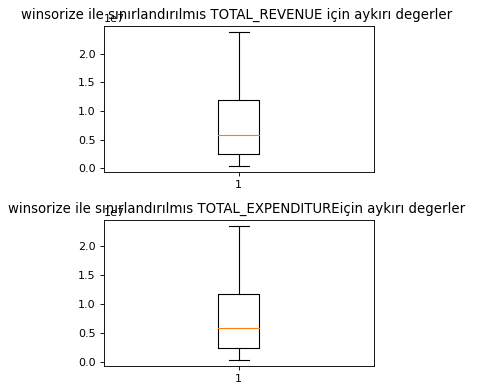

In [121]:
plt.rcParams["figure.dpi"]=80
plt.rcParams["figure.figsize"]=(4,5)

plt.subplot(2,1,1)
plt.boxplot(wi_TOTAL_REVENUE)
plt.title("winsorize ile sınırlandırılmıs TOTAL_REVENUE için aykırı degerler ")


plt.subplot(2,1,2)
plt.boxplot(wi_TOTAL_EXPENDITURE)
plt.title("winsorize ile sınırlandırılmıs TOTAL_EXPENDITUREiçin aykırı degerler ")
plt.tight_layout()
plt.show()

In [41]:
wi1_budget_deficit = wi_TOTAL_REVENUE - wi_TOTAL_EXPENDITURE

In [42]:
state["wi1_budget_deficit"] = wi1_budget_deficit

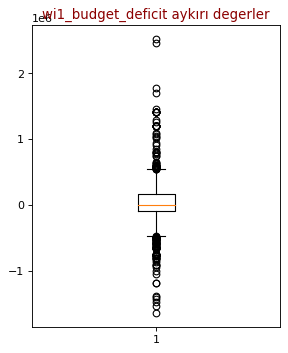

In [44]:
plt.boxplot(wi1_budget_deficit)                                       
plt.title("wi1_budget_deficit aykırı degerler",color ="darkred")       #aykırı degerlerden temizlenmiş olan yeni degisşkende de 
plt.show()                                                              #aykırı degerler var.

In [46]:
q75,q25 = np.percentile(wi1_budget_deficit,[75,25])
IQR = q75-q25
IQR
max_deger = q75 + IQR*1.5
min_deger = q25 - IQR*1.5

wi1_budget_aykiri_deger = len(np.where((wi1_budget_deficit > max_deger) | (wi1_budget_deficit < min_deger))[0])
print("wi1_budget_deficit değişkeni için aykırı deger sayisi: {}".format(wi1_budget_aykiri_deger))

wi1_budget_deficit değişkeni için aykırı deger sayisi: 150


In [118]:
wi1_temiz_budget_deficit = winsorize(state["wi1_budget_deficit"],(0.05,0.05))  
state["wi1_temiz_budget_deficit"] = wi1_temiz_budget_deficit

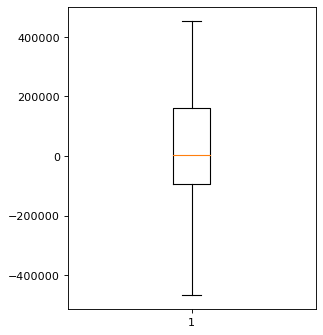

In [66]:
plt.boxplot(wi1_temiz_budget_deficit)             
plt.show()

### 5.Şimdi elimizde üçüncü ve ve dördüncü sorularda oluşturduğumuz iki farklı bütçe değişkeni var. Bu ikisi arasında fark görüyor musunuz?

In [67]:
budget_deficit = pd.DataFrame()
degisken = ["budget_deficit","wi1_budget_deficit"]      #3.soruda ve 4.soruda olusturulan bütçe acığı degiskeni için 
                                                        #aykırı degerleri karsılastırıldıgında %45 lik bir azalma görüyoruz.
for degisken in state[degisken]:                        # temizlenmiş verilerden olusan bütce acığı degiskeni daha az sayıda 
                                                        #aykırı degere sahip.
    q75,q25 = np.percentile(state[degisken],[75,25])
    IQR = q75 - q25
    max_deger = q75 + (IQR*1.5)
    min_deger = q25 - (IQR*1.5)
    aykiri_deger_sayisi = len(np.where((state[degisken] > max_deger) |
                                        (state[degisken] < min_deger))[0])
    


    budget_deficit=budget_deficit.append({"aykiri deger sayisi":aykiri_deger_sayisi},ignore_index=True)
        
    

budget_deficit.index = ["budget_deficit","wi1_budget_deficit"]     
budget_deficit

,aykiri deger sayisi
budget_deficit,276.0
wi1_budget_deficit,150.0


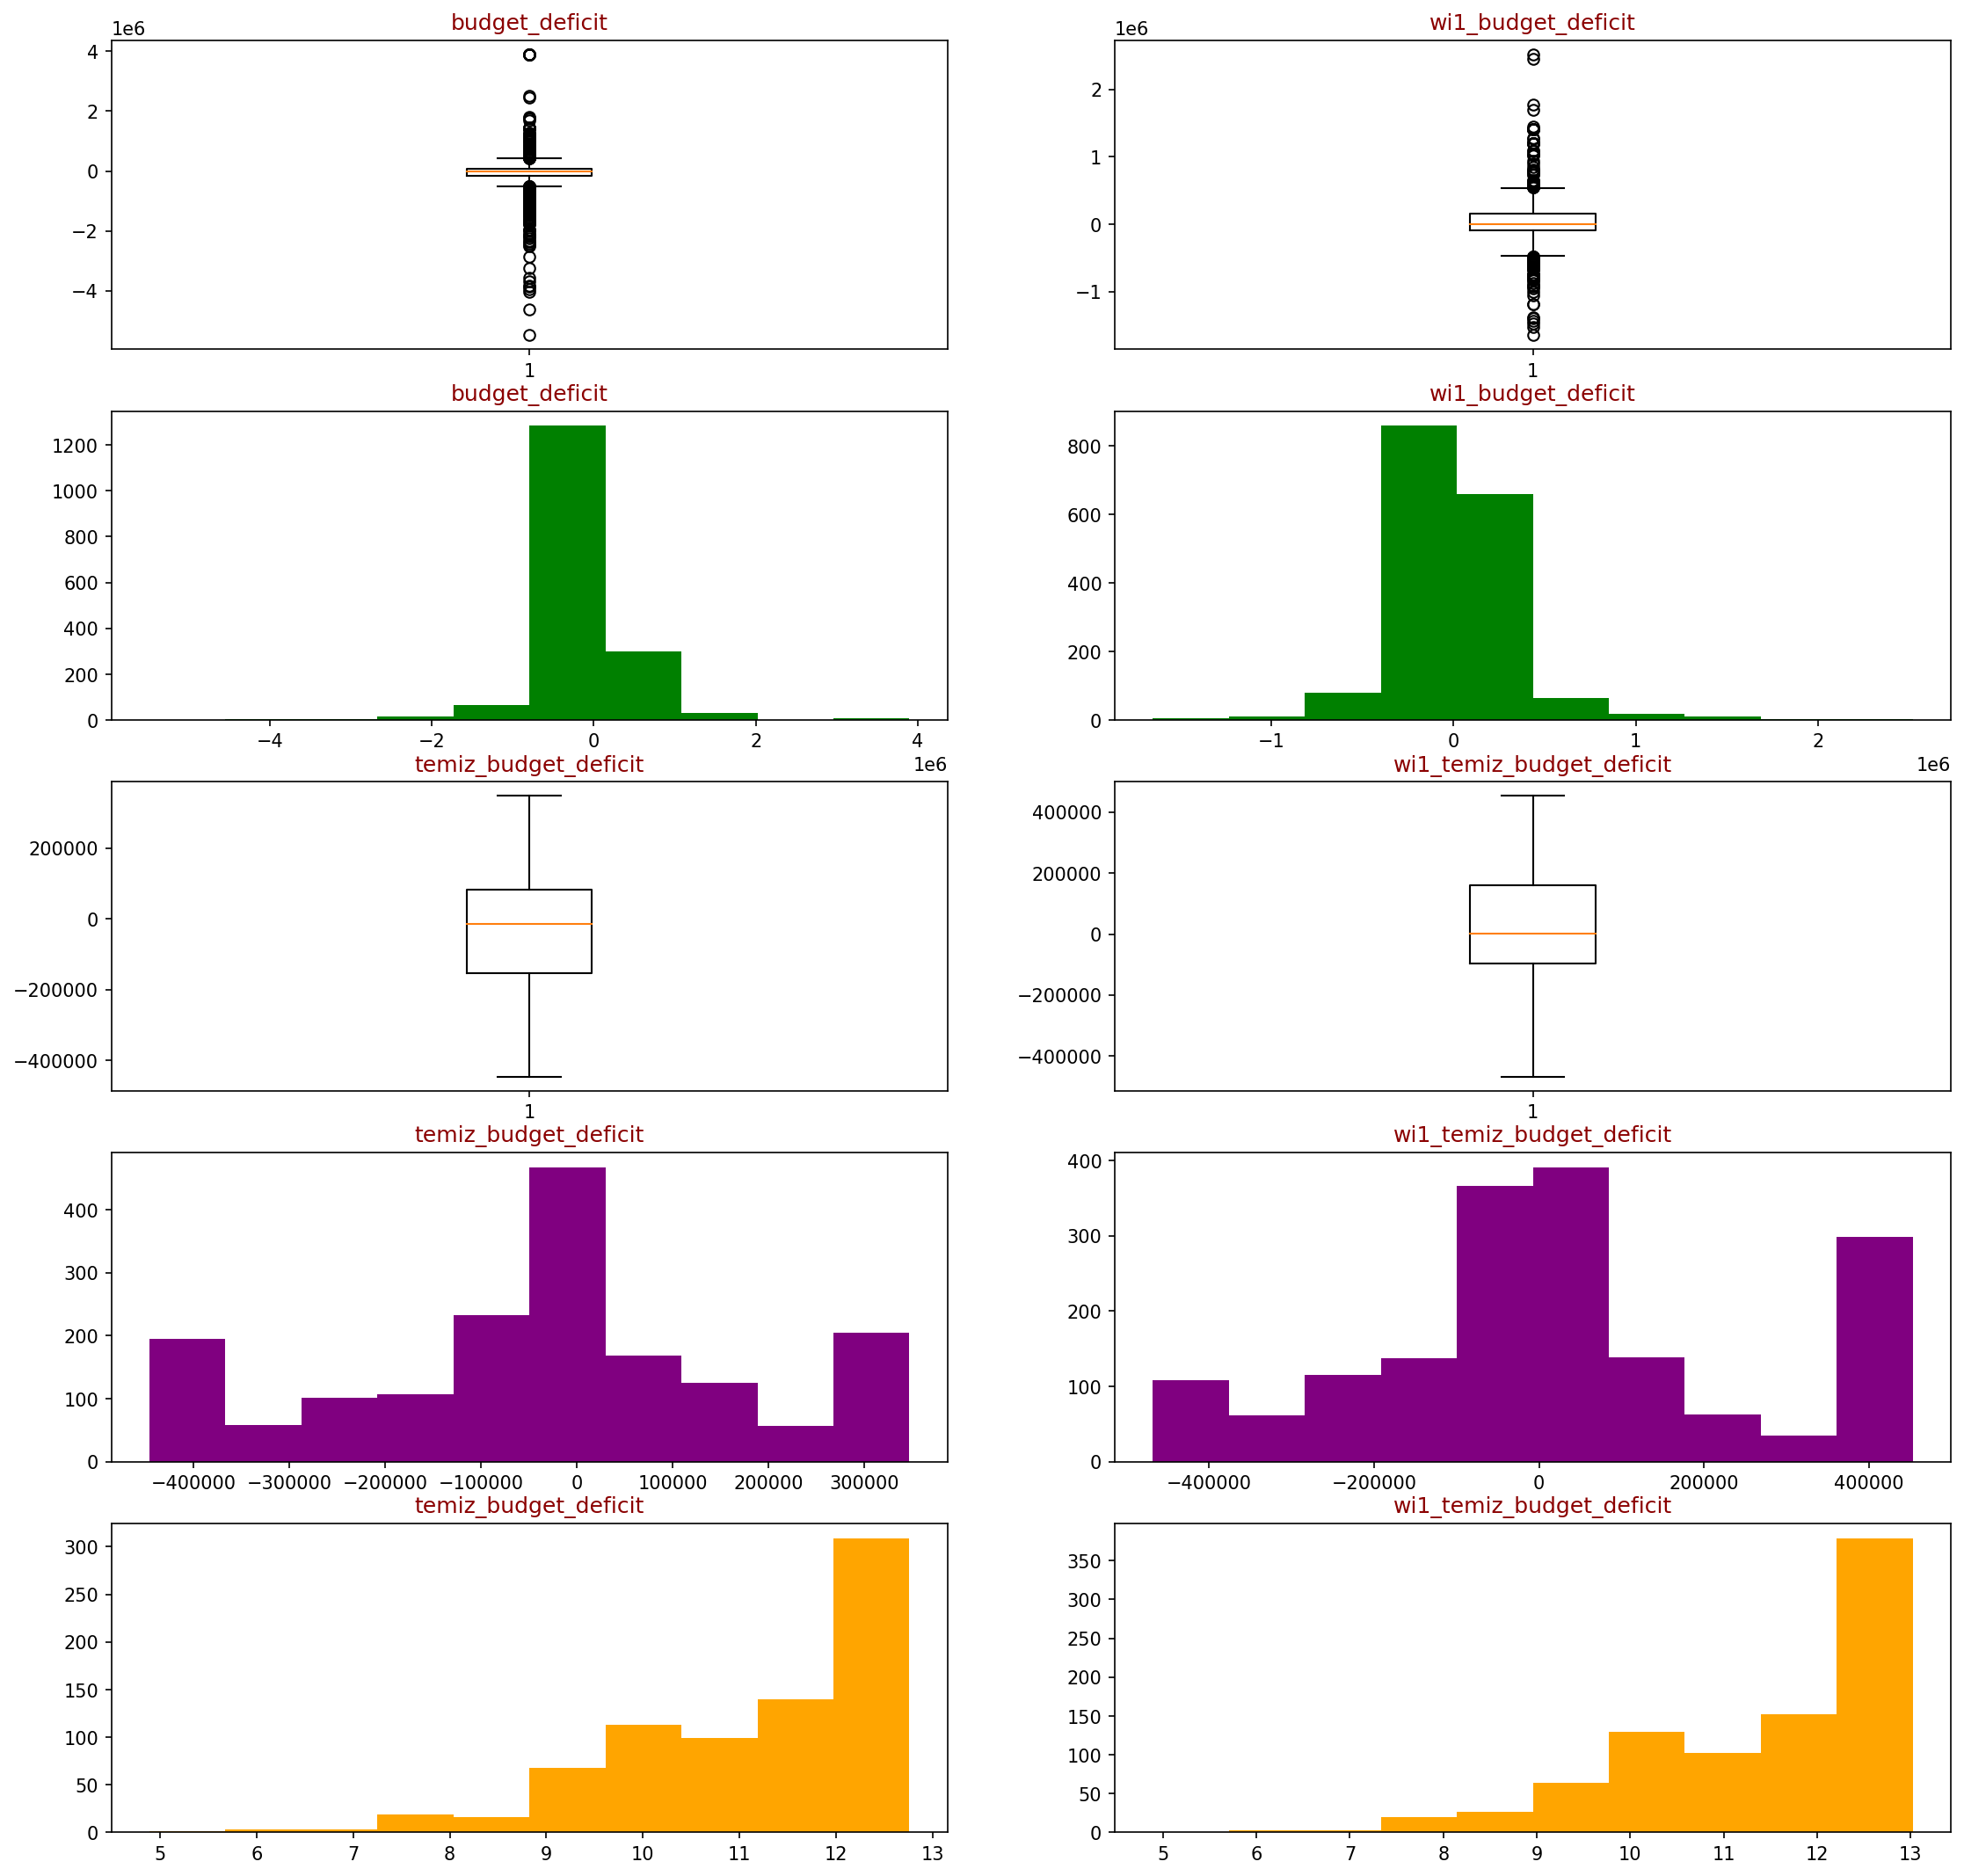

In [160]:
plt.rcParams["figure.dpi"]=150
plt.rcParams["figure.figsize"]=(18,18)
degisken1 = ["budget_deficit","wi1_budget_deficit"]
degisken2 = ["temiz_budget_deficit","wi1_temiz_budget_deficit"]
for i in range(2):
    
    plt.subplot(5,2,i+1)
    plt.boxplot(state[degisken1[i]])
    plt.title(degisken1[i],c ="darkred")
    
for i in range(2):
    
    plt.subplot(5,2,i+3)
    plt.hist(state[degisken1[i]],color="green")
    plt.title(degisken1[i],c ="darkred")

for i in range(2):       
    plt.subplot(5,2,i+5)
    plt.boxplot(state[degisken2[i]])
    plt.title(degisken2[i],c ="darkred")
    
for i in range(2):       
    plt.subplot(5,2,i+7)
    plt.hist(state[degisken2[i]],color="purple")
    plt.title(degisken2[i],c ="darkred")
    
for i in range(2):       
    plt.subplot(5,2,i+9)
    plt.hist(np.log(state[degisken2[i]]),color ="orange")
    plt.title(degisken2[i],c ="darkred")

### 6.Bizim için bütçe açığı çok önemli bir değişken olsaydı aykırı değerleri temizlemek için hangi yöntem daha iyi olurdu. Üçüncü soruda uguladığınız yöntem mi yoksa dördüncü sorudaki yöntem mi?

In [ ]:
## aykırı deger sayısının daha az olmasından dolayı 4.soruda uyguladığımız yöntem daha kullanıslıdır.